In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data cleaning

In [3]:
diction = pd.read_csv('data_dictionary.csv', encoding='cp1252')
diction.head()

,summerOly_medal_counts.csv,Unnamed: 1,Unnamed: 2
0,variables,explanation,example
1,Rank,Rank of country based on total medals won,"1, 2"
2,NOC,Name of country as recorded for that Olympics,"China, France"
3,Gold,Number of Gold medals the country earned,"0, 1, 2"
4,Silver,Number of Silver medals the country earned,"0, 1, 2"


In [4]:
ath = pd.read_csv('summerOly_athletes.csv')
ath.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [5]:
medal = pd.read_csv('summerOly_medal_counts.csv')
medal.head()

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,11,7,2,20,1896
1,2,Greece,10,18,19,47,1896
2,3,Germany,6,5,2,13,1896
3,4,France,5,4,2,11,1896
4,5,Great Britain,2,3,2,7,1896


In [6]:
medal=medal.groupby(['Year','NOC']).agg({
    'Gold':'sum',
    'Silver':'sum',
    'Bronze':'sum',
    'Total':'sum'}).reset_index()
medal.head()

,Year,NOC,Gold,Silver,Bronze,Total
0,1896,Australia,2,0,0,2
1,1896,Austria,2,1,2,5
2,1896,Denmark,1,2,3,6
3,1896,France,5,4,2,11
4,1896,Germany,6,5,2,13


In [7]:
programs = pd.read_csv('summerOly_programs.csv', encoding='cp1252')
programs.shape
programs.head()

,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906*,1908,1912,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
0,Aquatics,Artistic Swimming,SWA,World Aquatics,0,0,0,0,0,0,...,2,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,Aquatics,Diving,DIV,World Aquatics,0,0,2,1,2,4,...,4,4,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,Aquatics,Marathon Swimming,OWS,World Aquatics,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,Aquatics,Swimming,SWM,World Aquatics,4,7,9,4,6,9,...,31,31,32.0,32.0,32.0,32.0,32.0,32.0,35.0,35.0
4,Aquatics,Water Polo,WPO,World Aquatics,0,1,1,0,1,1,...,1,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [8]:
ath['Sex'] = ath['Sex'].map({'M': 1, 'F': 0})
ath.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,1,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,1,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,1,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,1,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),0,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [9]:
hosts = pd.read_csv('summerOly_hosts.csv')
hosts.head(8)

,Year,Host
0,1896,"Athens, Greece"
1,1900,"Paris, France"
2,1904,"St. Louis, United States"
3,1908,"London, United Kingdom"
4,1912,"Stockholm, Sweden"
5,1916,Cancelled (WWI – Berlin had been awarded)
6,1920,"Antwerp, Belgium"
7,1924,"Paris, France"


In [10]:
hosts[['host_city', 'host_country']] = hosts['Host'] \
    .str.split(',', n=1, expand=True)
hosts['host_city']   = hosts['host_city']  .str.strip()
hosts['host_country']= hosts['host_country'].str.strip()
hosts.head(8)

,Year,Host,host_city,host_country
0,1896,"Athens, Greece",Athens,Greece
1,1900,"Paris, France",Paris,France
2,1904,"St. Louis, United States",St. Louis,United States
3,1908,"London, United Kingdom",London,United Kingdom
4,1912,"Stockholm, Sweden",Stockholm,Sweden
5,1916,Cancelled (WWI – Berlin had been awarded),Cancelled (WWI – Berlin had been awarded),None
6,1920,"Antwerp, Belgium",Antwerp,Belgium
7,1924,"Paris, France",Paris,France


In [11]:
city2country = dict(zip(hosts['host_city'], hosts['host_country']))
ath['Country'] = ath['City'].str.strip().map(city2country)
ath.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal,Country
0,A Dijiang,1,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal,Spain
1,A Lamusi,1,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal,United Kingdom
2,Gunnar Aaby,1,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal,NaN
3,Edgar Aabye,1,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,France
4,Cornelia (-strannood),0,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal,United States


In [12]:
#Year → host_country
year2country = hosts.set_index('Year')['host_country'].to_dict()
#Country
ath['Country'] = ath['Year'].map(year2country)

ath.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal,Country
0,A Dijiang,1,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal,Spain
1,A Lamusi,1,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal,United Kingdom
2,Gunnar Aaby,1,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal,Belgium
3,Edgar Aabye,1,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,France
4,Cornelia (-strannood),0,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal,United States


In [13]:
medal.isnull().sum()
programs.isnull().sum()
ath.isnull().sum()

Name          0
Sex           0
Team          0
NOC           0
Year          0
City          0
Sport         0
Event         0
Medal         0
Country    1733
dtype: int64

In [14]:
missing_country = ath[ath['Country'].isnull()]
print("Missing country records by year:")
print(missing_country['Year'].value_counts().sort_index())
print("Missing country but have NOC:")
print(missing_country['NOC'].value_counts())
# NOC fill Country
ath['Country'] = ath['Country'].fillna(ath['NOC'])
noc_to_country = ath.dropna(subset=['Country']).groupby('NOC')['Country'].first().to_dict()
ath['Country'] = ath['Country'].fillna(ath['NOC'].map(noc_to_country))

Missing country records by year:
Year
1906    1733
Name: count, dtype: int64
Missing country but have NOC:
NOC
GRE    484
FRA    174
GER    157
GBR    113
ITA    103
AUT    100
HUN     99
SWE     95
USA     81
DEN     68
NOR     55
NED     49
SUI     45
BEL     31
BOH     29
FIN     18
CRT     11
AUS     10
EGY      5
CAN      4
TUR      2
Name: count, dtype: int64


In [15]:
noc_to_country_mapping = ath[ath['Country'].notna()].groupby('NOC')['Country'].first().to_dict()

print("Available NOC to Country mappings:")
missing_nocs = ath[ath['Country'].isna()]['NOC'].unique()
for noc in missing_nocs[:10]: 
    if noc in noc_to_country_mapping:
        print(f"{noc} -> {noc_to_country_mapping[noc]}")
    else:
        print(f"{noc} -> NO MAPPING FOUND")

ath['Country'] = ath['Country'].fillna(ath['NOC'].map(noc_to_country_mapping))

print("After filling:")
print(ath['Country'].isnull().sum())

Available NOC to Country mappings:
After filling:
0


## Visualization

In [17]:
print(f"time: {medal['Year'].min()} - {medal['Year'].max()}")
print(f"country: {medal['NOC'].nunique()}")
print(f"total: {medal['Year'].nunique()}")
print(f"ath: {ath.shape[0]}")
print(f"ath with medal: {ath[ath['Medal'] != 'No medal'].shape[0]}")

time: 1896 - 2024
country: 210
total: 30
ath: 252565
ath with medal: 38818


In [18]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

### assumption：Historical data is informative and mainly based on recent years.


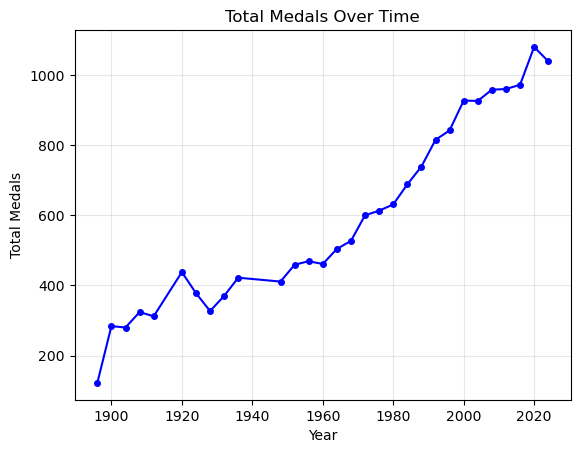

In [20]:
plt.subplot(1, 1, 1)
total_medals_by_year = medal.groupby('Year')['Total'].sum()
plt.plot(total_medals_by_year.index, total_medals_by_year.values, 'b-o', markersize=4)
plt.title('Total Medals Over Time')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.grid(True, alpha=0.3)

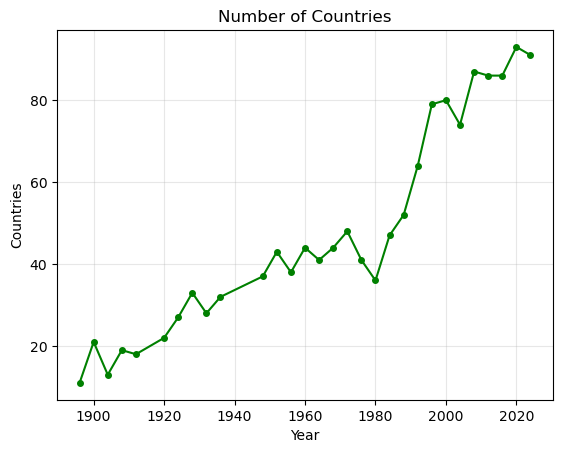

In [21]:
plt.subplot(1, 1, 1)
countries_by_year = medal.groupby('Year')['NOC'].nunique()
plt.plot(countries_by_year.index, countries_by_year.values, 'g-o', markersize=4)
plt.title('Number of Countries')
plt.xlabel('Year')
plt.ylabel('Countries')
plt.grid(True, alpha=0.3)

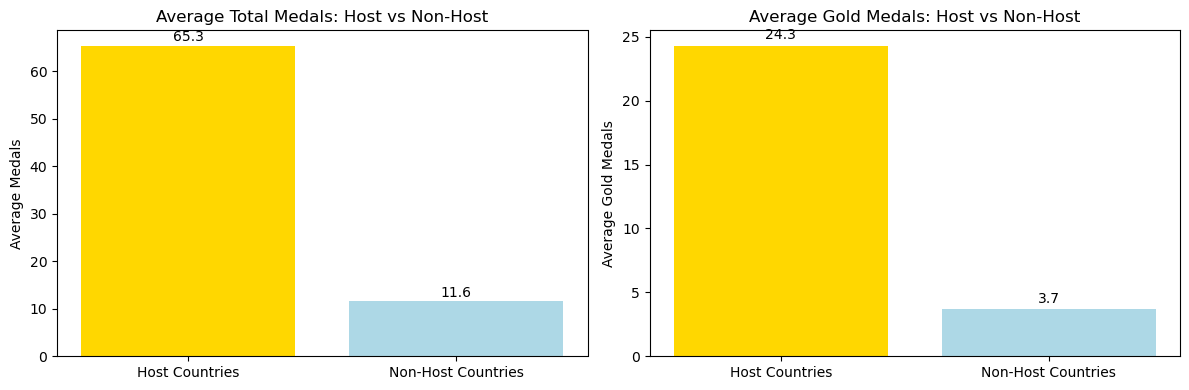

In [22]:
medal['is_host'] = medal.apply(lambda row: year2country.get(row['Year']) == row['NOC'], axis=1)

host_avg = medal[medal['is_host']]['Total'].mean()
non_host_avg = medal[~medal['is_host']]['Total'].mean()
host_gold_avg = medal[medal['is_host']]['Gold'].mean()
non_host_gold_avg = medal[~medal['is_host']]['Gold'].mean()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(['Host Countries', 'Non-Host Countries'], [host_avg, non_host_avg], 
       color=['gold', 'lightblue'])
plt.title('Average Total Medals: Host vs Non-Host')
plt.ylabel('Average Medals')
plt.text(0, host_avg + 1, f'{host_avg:.1f}', ha='center')
plt.text(1, non_host_avg + 1, f'{non_host_avg:.1f}', ha='center')

plt.subplot(1, 2, 2)
plt.bar(['Host Countries', 'Non-Host Countries'], [host_gold_avg, non_host_gold_avg], 
       color=['gold', 'lightblue'])
plt.title('Average Gold Medals: Host vs Non-Host')
plt.ylabel('Average Gold Medals')
plt.text(0, host_gold_avg + 0.5, f'{host_gold_avg:.1f}', ha='center')
plt.text(1, non_host_gold_avg + 0.5, f'{non_host_gold_avg:.1f}', ha='center')

plt.tight_layout()
plt.show()

### assumption: host country has advantages

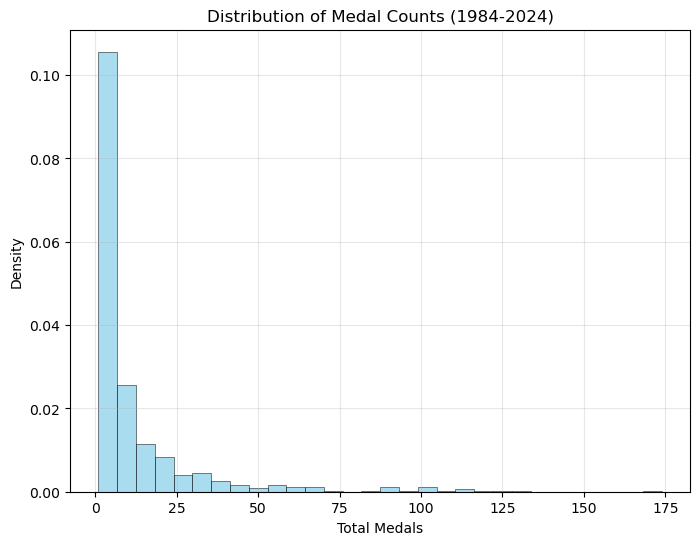

In [24]:
recent_medals = medal[medal['Year'] >= 1984]['Total']

plt.figure(figsize=(8, 6))
plt.hist(recent_medals, bins=30, alpha=0.7, color='skyblue', density=True, 
        edgecolor='black', linewidth=0.5)
plt.xlabel('Total Medals')
plt.ylabel('Density')
plt.title('Distribution of Medal Counts (1984-2024)')
plt.grid(True, alpha=0.3)
plt.show()

### assumption: advantage area stable

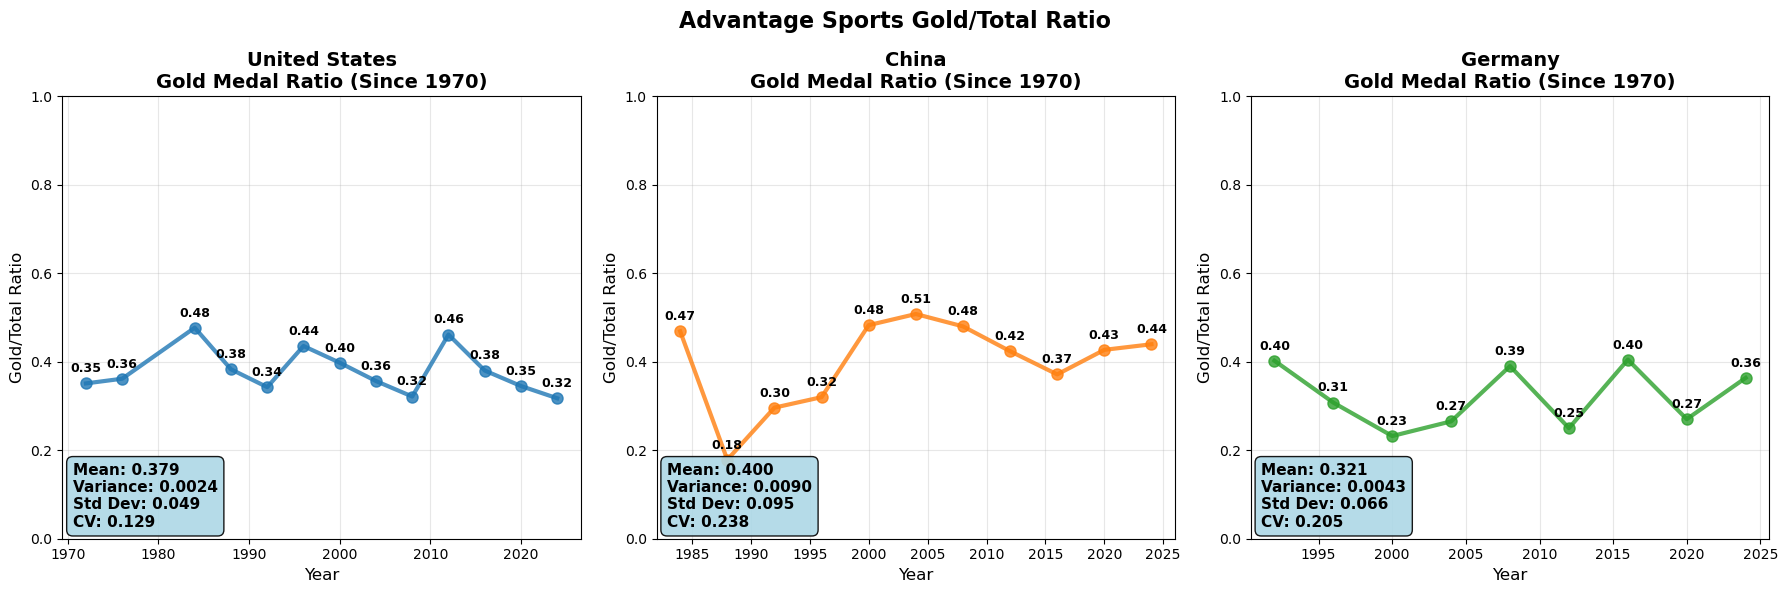

In [26]:
selected_countries = ['United States', 'China', 'Germany']

country_specializations = {
   'United States': 'Swimming & Athletics',
   'China': 'Gymnastics & Diving',
   'Germany': 'Athletics & Swimming'
}

medal_winners = ath[(ath['Medal'] != 'No medal') & (ath['Year'] >= 1970)].copy()

def get_sport_category(sport):
   if any(x in sport for x in ['Swimming', 'Diving', 'Water Polo', 'Artistic Swimming']):
       return 'Aquatics'
   elif 'Athletics' in sport:
       return 'Athletics'  
   elif 'Gymnastics' in sport:
       return 'Gymnastics'
   elif sport in ['Boxing', 'Wrestling', 'Judo', 'Taekwondo', 'Fencing']:
       return 'Combat Sports'
   elif sport in ['Basketball', 'Football', 'Volleyball', 'Hockey', 'Handball']:
       return 'Team Sports'
   elif 'Cycling' in sport or 'Rowing' in sport:
       return 'Cycling & Rowing'
   else:
       return 'Other Sports'

medal_winners['Sport_Category'] = medal_winners['Sport'].apply(get_sport_category)

country_advantage_categories = {
   'United States': ['Aquatics', 'Athletics'],
   'China': ['Gymnastics', 'Aquatics'],
   'Germany': ['Athletics', 'Aquatics']
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, country in enumerate(selected_countries):
   ax = axes[i]
   
   country_ath_data = medal_winners[medal_winners['NOC'] == country]
   
   if len(country_ath_data) > 0:
       years = []
       ratios = []
       advantage_cats = country_advantage_categories.get(country, ['Athletics', 'Aquatics'])
       
       for year in sorted(country_ath_data['Year'].unique()):
           year_data = country_ath_data[country_ath_data['Year'] == year]
           total_year_medals = len(year_data)
           
           if total_year_medals >= 3: 
               advantage_medals = len(year_data[year_data['Sport_Category'].isin(advantage_cats)])
               ratio = advantage_medals / total_year_medals
               
               years.append(year)
               ratios.append(ratio)
       
       if len(years) > 1:
           ax.plot(years, ratios, 'o-', linewidth=3, markersize=8, 
                  color=colors[i], alpha=0.8)
           
           variance = np.var(ratios)
           std_dev = np.std(ratios)
           mean_ratio = np.mean(ratios)
           cv = std_dev / mean_ratio if mean_ratio > 0 else 0
           
           ax.set_title(f'{country}\nAdvantage: {country_specializations.get(country, "Various")}', 
                       fontsize=14, fontweight='bold')
           ax.set_xlabel('Year', fontsize=12)
           ax.set_ylabel('Advantage Sports Ratio', fontsize=12)
           ax.set_ylim(0, 1)
           ax.grid(True, alpha=0.3)
           
           stats_text = f'Mean: {mean_ratio:.3f}\nVariance: {variance:.4f}\nStd Dev: {std_dev:.3f}\nCV: {cv:.3f}'
           ax.text(0.02, 0.02, stats_text, transform=ax.transAxes, 
                  fontsize=11, verticalalignment='bottom', fontweight='bold',
                  bbox=dict(boxstyle="round,pad=0.4", facecolor="lightgray", alpha=0.9))
           
           for year, ratio in zip(years, ratios):
               ax.annotate(f'{ratio:.2f}', (year, ratio), 
                          textcoords="offset points", xytext=(0,8), ha='center', 
                          fontsize=9, fontweight='bold')
   
   else:
       country_medal_data = medal[(medal['NOC'] == country) & (medal['Year'] >= 1970)].sort_values('Year')
       
       if len(country_medal_data) > 1:
           years = country_medal_data['Year'].values
           gold_ratios = country_medal_data['Gold'] / country_medal_data['Total']
           gold_ratios = gold_ratios.fillna(0)
           
           ax.plot(years, gold_ratios, 'o-', linewidth=3, markersize=8, 
                  color=colors[i], alpha=0.8)
           
           variance = np.var(gold_ratios)
           std_dev = np.std(gold_ratios)
           mean_ratio = np.mean(gold_ratios)
           cv = std_dev / mean_ratio if mean_ratio > 0 else 0
           
           ax.set_title(f'{country}\nGold Medal Ratio (Since 1970)', 
                       fontsize=14, fontweight='bold')
           ax.set_xlabel('Year', fontsize=12)
           ax.set_ylabel('Gold/Total Ratio', fontsize=12)
           ax.set_ylim(0, 1)
           ax.grid(True, alpha=0.3)
           
           stats_text = f'Mean: {mean_ratio:.3f}\nVariance: {variance:.4f}\nStd Dev: {std_dev:.3f}\nCV: {cv:.3f}'
           ax.text(0.02, 0.02, stats_text, transform=ax.transAxes, 
                  fontsize=11, verticalalignment='bottom', fontweight='bold',
                  bbox=dict(boxstyle="round,pad=0.4", facecolor="lightblue", alpha=0.9))
           
           for year, ratio in zip(years, gold_ratios):
               ax.annotate(f'{ratio:.2f}', (year, ratio), 
                          textcoords="offset points", xytext=(0,8), ha='center', 
                          fontsize=9, fontweight='bold')

plt.suptitle('Advantage Sports Gold/Total Ratio', 
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## useless

Top national medal trends
The top 10 countries in the total: ['United States', 'Great Britain', 'Soviet Union', 'France', 'China', 'Germany', 'Italy', 'Australia', 'Japan', 'Hungary']


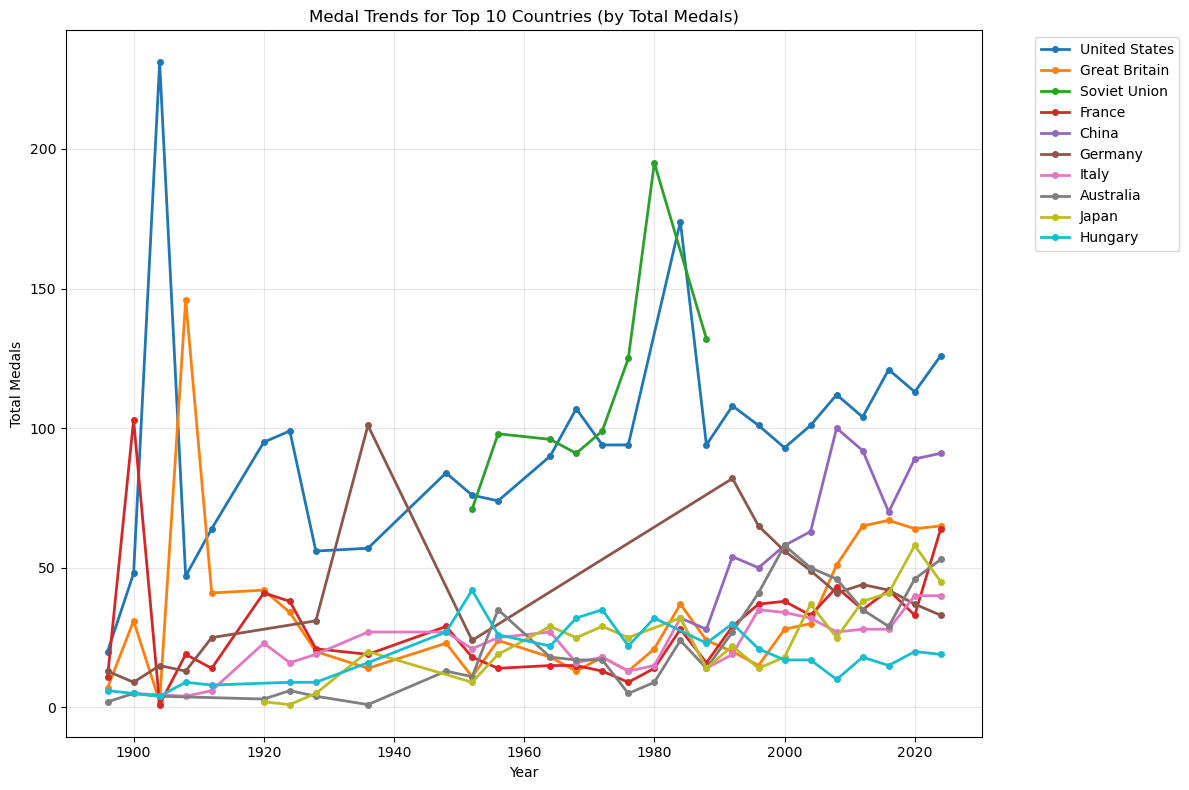

In [28]:
print("Top national medal trends")
top_countries = medal.groupby('NOC')['Total'].sum().nlargest(10).index
print("The top 10 countries in the total:", list(top_countries))

plt.figure(figsize=(12, 8))
colors = plt.cm.tab10(np.linspace(0, 1, len(top_countries)))

for i, country in enumerate(top_countries):
    country_data = medal[medal['NOC'] == country].sort_values('Year')
    if len(country_data) > 0:
        plt.plot(country_data['Year'], country_data['Total'], 
                label=country, marker='o', color=colors[i], linewidth=2, markersize=4)

plt.title('Medal Trends for Top 10 Countries (by Total Medals)')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


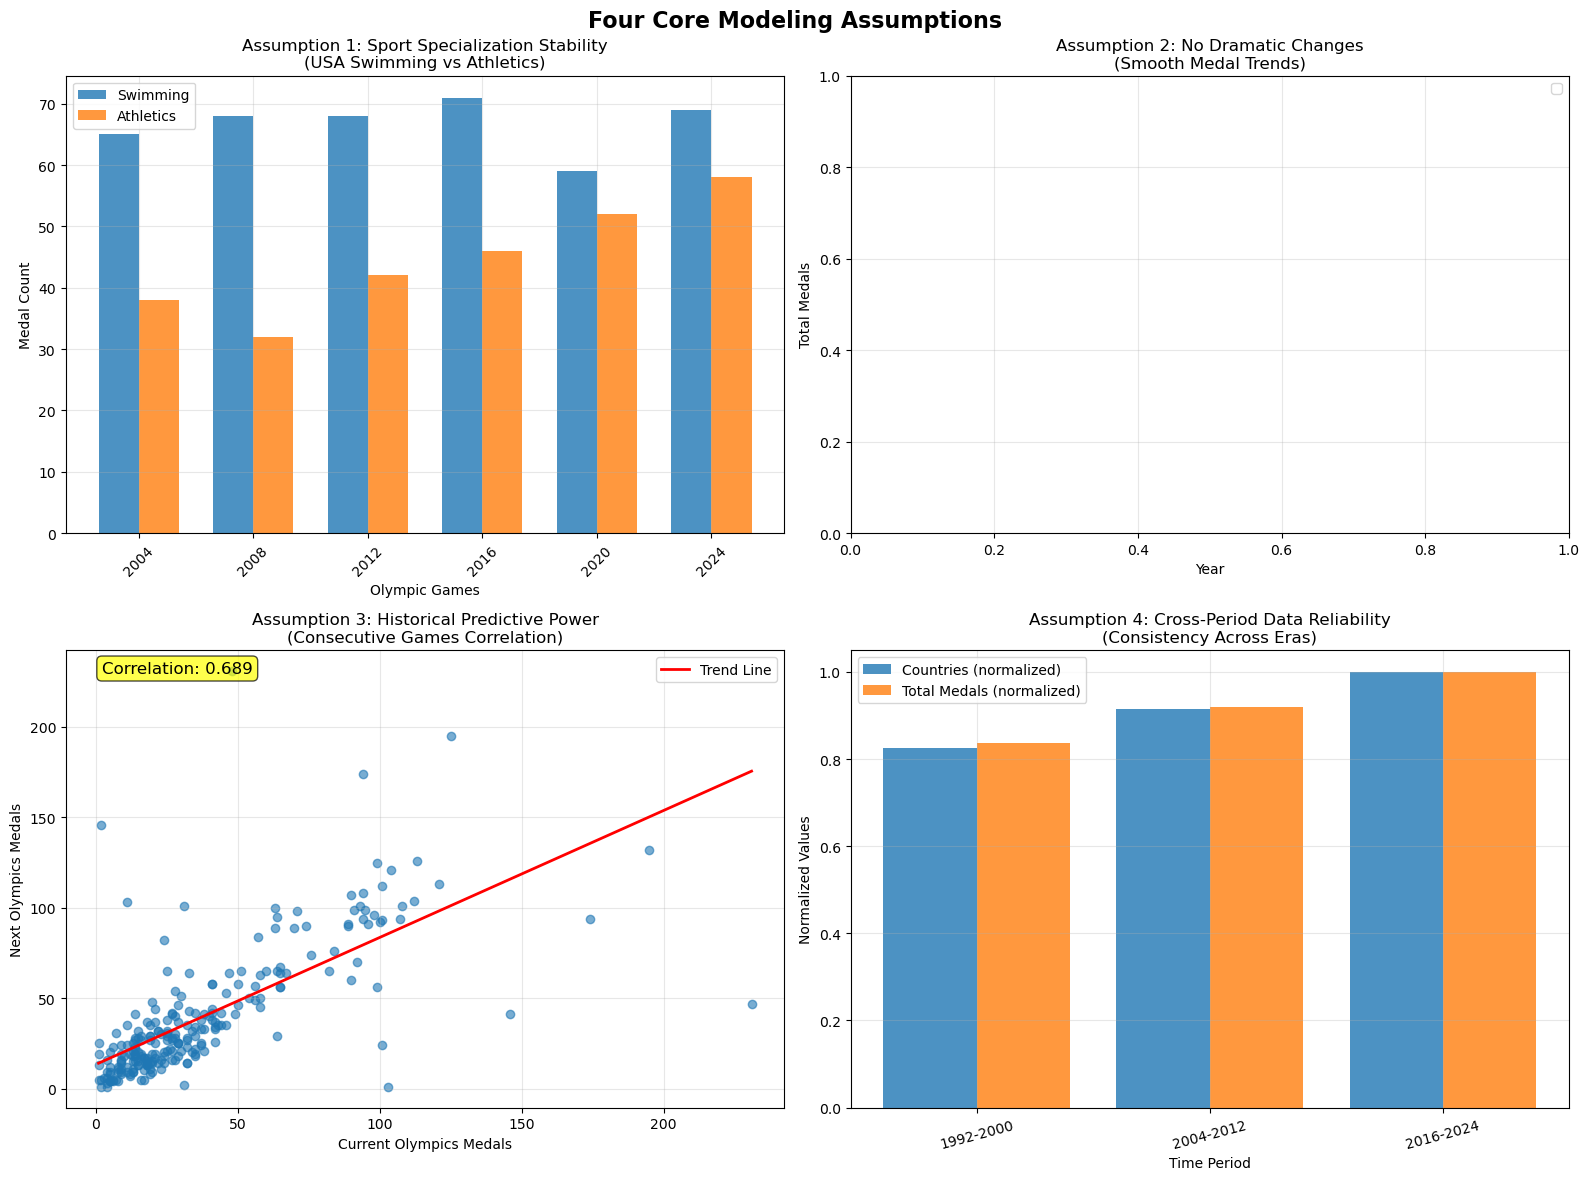


HYPOTHESIS VALIDATION SUMMARY
✓ Assumption 1: Sport specialization remains stable over time
✓ Assumption 2: Medal counts show smooth trends without dramatic jumps
✓ Assumption 3: Historical performance has predictive value
✓ Assumption 4: Data reliability is consistent across different eras


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

def create_simple_hypothesis_charts(medal, programs, hosts, ath):
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Four Core Modeling Assumptions', fontsize=16, fontweight='bold')
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    

    ax1 = axes[0, 0]
    
    medal_winners = ath[ath['Medal'] != 'No medal']
    usa_data = medal_winners[medal_winners['NOC'] == 'USA']
    
    swimming_by_year = usa_data[usa_data['Sport'] == 'Swimming'].groupby('Year').size()
    athletics_by_year = usa_data[usa_data['Sport'] == 'Athletics'].groupby('Year').size()
    
    common_years = sorted(set(swimming_by_year.index) & set(athletics_by_year.index))
    if len(common_years) > 5:
        common_years = common_years[-6:]
    
    swimming_counts = [swimming_by_year.get(year, 0) for year in common_years]
    athletics_counts = [athletics_by_year.get(year, 0) for year in common_years]
    
    x = range(len(common_years))
    width = 0.35
    
    ax1.bar([i - width/2 for i in x], swimming_counts, width, label='Swimming', color=colors[0], alpha=0.8)
    ax1.bar([i + width/2 for i in x], athletics_counts, width, label='Athletics', color=colors[1], alpha=0.8)
    
    ax1.set_xlabel('Olympic Games')
    ax1.set_ylabel('Medal Count')
    ax1.set_title('Assumption 1: Sport Specialization Stability\n(USA Swimming vs Athletics)')
    ax1.set_xticks(x)
    ax1.set_xticklabels([str(year) for year in common_years], rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    

    ax2 = axes[0, 1]
    
    
    major_countries = ['USA', 'CHN', 'GBR', 'GER']
    
    for i, country in enumerate(major_countries):
        country_data = medal[medal['NOC'] == country].sort_values('Year')
    
        modern_data = country_data[country_data['Year'] >= 1992]
        if len(modern_data) >= 4:
            ax2.plot(modern_data['Year'], modern_data['Total'], 
                    'o-', linewidth=2.5, markersize=5, label=country, color=colors[i])
    
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Total Medals')
    ax2.set_title('Assumption 2: No Dramatic Changes\n(Smooth Medal Trends)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    
    ax3 = axes[1, 0]
    
    current_medals = []
    next_medals = []
    
    top_countries = medal.groupby('NOC')['Total'].sum().nlargest(12).index
    
    for country in top_countries:
        country_data = medal[medal['NOC'] == country].sort_values('Year')
        if len(country_data) >= 4:
            medals = country_data['Total'].values
            current_medals.extend(medals[:-1])
            next_medals.extend(medals[1:])
    
    if len(current_medals) > 0 and len(next_medals) > 0:
        ax3.scatter(current_medals, next_medals, alpha=0.6, color=colors[0])
        
        if len(current_medals) > 1:
            z = np.polyfit(current_medals, next_medals, 1)
            p = np.poly1d(z)
            x_line = np.linspace(min(current_medals), max(current_medals), 100)
            ax3.plot(x_line, p(x_line), "r-", linewidth=2, label='Trend Line')
            
            corr = np.corrcoef(current_medals, next_medals)[0,1]
            ax3.text(0.05, 0.95, f'Correlation: {corr:.3f}', 
                    transform=ax3.transAxes, fontsize=12,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    ax3.set_xlabel('Current Olympics Medals')
    ax3.set_ylabel('Next Olympics Medals')
    ax3.set_title('Assumption 3: Historical Predictive Power\n(Consecutive Games Correlation)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    ax4 = axes[1, 1]
    
    periods = {
        '1992-2000': (1992, 2000),
        '2004-2012': (2004, 2012),
        '2016-2024': (2016, 2024)
    }
    
    period_names = []
    countries_count = []
    total_medals = []
    
    for period_name, (start, end) in periods.items():
        period_data = medal[(medal['Year'] >= start) & (medal['Year'] <= end)]
        
        if len(period_data) > 0:
            avg_countries = period_data.groupby('Year')['NOC'].nunique().mean()
            avg_total = period_data.groupby('Year')['Total'].sum().mean()
            
            period_names.append(period_name)
            countries_count.append(avg_countries)
            total_medals.append(avg_total)
    
    x = range(len(period_names))
    
    if len(countries_count) > 0 and len(total_medals) > 0:
        norm_countries = [c/max(countries_count) for c in countries_count]
        norm_medals = [m/max(total_medals) for m in total_medals]
        
        ax4.bar([i - 0.2 for i in x], norm_countries, 0.4, 
               label='Countries (normalized)', color=colors[0], alpha=0.8)
        ax4.bar([i + 0.2 for i in x], norm_medals, 0.4,
               label='Total Medals (normalized)', color=colors[1], alpha=0.8)
    
    ax4.set_xlabel('Time Period')
    ax4.set_ylabel('Normalized Values')
    ax4.set_title('Assumption 4: Cross-Period Data Reliability\n(Consistency Across Eras)')
    ax4.set_xticks(x)
    ax4.set_xticklabels(period_names, rotation=15)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def create_alternative_simple_charts(medal, ath):
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    
    ax1 = axes[0, 0]
    medal_winners = ath[ath['Medal'] != 'No medal']
    usa_swimming = medal_winners[(medal_winners['NOC'] == 'USA') & 
                                (medal_winners['Sport'] == 'Swimming')]
    swimming_by_year = usa_swimming.groupby('Year').size()
    
    if len(swimming_by_year) > 0:
        years = list(swimming_by_year.index)[-8:]
        counts = [swimming_by_year.get(year, 0) for year in years]
        ax1.bar(range(len(years)), counts, color=colors[0], alpha=0.7)
        ax1.set_title('USA Swimming Medal Consistency')
        ax1.set_xticks(range(len(years)))
        ax1.set_xticklabels(years, rotation=45)
        ax1.set_ylabel('Medals')
    
    ax2 = axes[0, 1] 
    for i, country in enumerate(['USA', 'CHN']):
        country_data = medal[medal['NOC'] == country].sort_values('Year')
        recent_data = country_data[country_data['Year'] >= 1992]
        if len(recent_data) > 0:
            ax2.plot(recent_data['Year'], recent_data['Total'], 
                    'o-', label=country, color=colors[i], linewidth=2)
    ax2.set_title('Smooth Medal Trends')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Total Medals')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    ax3 = axes[1, 0]
    usa_data = medal[medal['NOC'] == 'USA'].sort_values('Year')
    if len(usa_data) >= 3:
        medals = usa_data['Total'].values[-6:]
        if len(medals) > 1:
            current = medals[:-1]
            next_med = medals[1:]
            ax3.scatter(current, next_med, s=60, color=colors[2])
            ax3.plot([min(current), max(current)], [min(current), max(current)], 
                    'r--', alpha=0.5)
            ax3.set_title('Historical Predictive Power')
            ax3.set_xlabel('Current Olympics')
            ax3.set_ylabel('Next Olympics')
    
    ax4 = axes[1, 1]
    participation = medal.groupby('Year')['NOC'].nunique()
    recent_years = [year for year in participation.index if year >= 1992]
    recent_participation = [participation[year] for year in recent_years]
    
    ax4.plot(recent_years, recent_participation, 'o-', color=colors[3], linewidth=2)
    ax4.set_title('Consistent Data Quality')
    ax4.set_xlabel('Year') 
    ax4.set_ylabel('Participating Countries')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

create_simple_hypothesis_charts(medal, programs, hosts, ath)

## old data

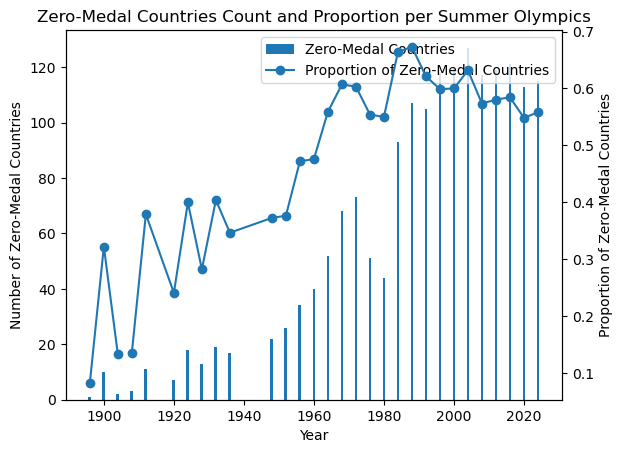

In [31]:

import matplotlib.pyplot as plt

participating = ath.groupby('Year')['NOC'].nunique().reset_index(name='participating_nocs')

medal_nocs = medal.groupby('Year')['NOC'].nunique().reset_index(name='medal_nocs')

df = pd.merge(participating, medal_nocs, on='Year', how='left')
#df['medal_nocs'].fillna(0, inplace=True)
df['zero_count'] = df['participating_nocs'] - df['medal_nocs']
df['zero_prop'] = df['zero_count'] / df['participating_nocs']

fig, ax = plt.subplots()
ax.bar(df['Year'], df['zero_count'], label='Zero-Medal Countries')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Zero-Medal Countries')
ax.set_title('Zero-Medal Countries Count and Proportion per Summer Olympics')

ax2 = ax.twinx()
ax2.plot(df['Year'], df['zero_prop'], marker='o', label='Proportion of Zero-Medal Countries')
ax2.set_ylabel('Proportion of Zero-Medal Countries')

lines, labels   = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper right')


plt.show()


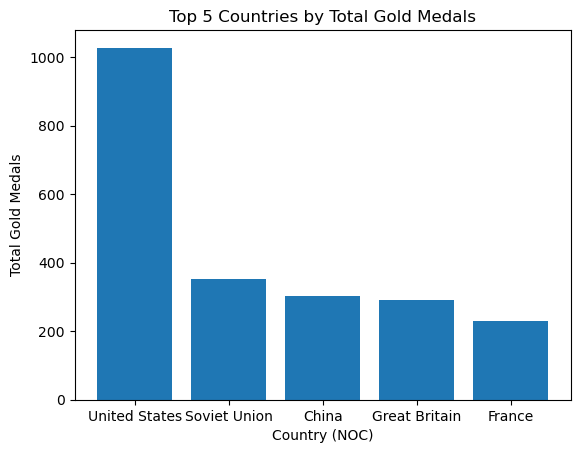

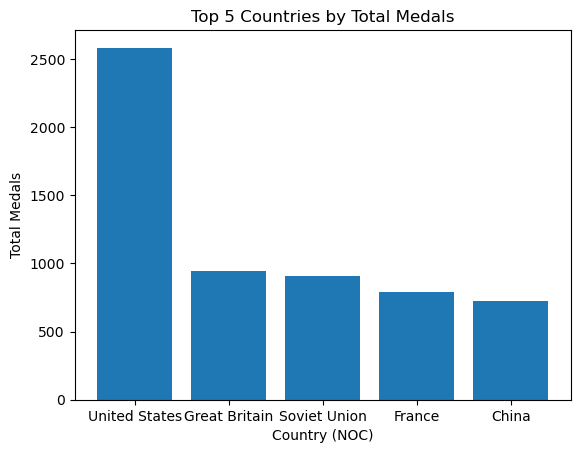

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

gold_by_noc = medal.groupby('NOC')['Gold'].sum().reset_index()
total_by_noc = medal.groupby('NOC')['Total'].sum().reset_index()

top5_gold = gold_by_noc.sort_values('Gold', ascending=False).head(5)
top5_total = total_by_noc.sort_values('Total', ascending=False).head(5)

fig, ax = plt.subplots()
ax.bar(top5_gold['NOC'], top5_gold['Gold'])
ax.set_title('Top 5 Countries by Total Gold Medals')
ax.set_xlabel('Country (NOC)')
ax.set_ylabel('Total Gold Medals')
plt.show()

fig, ax = plt.subplots()
ax.bar(top5_total['NOC'], top5_total['Total'])
ax.set_title('Top 5 Countries by Total Medals')
ax.set_xlabel('Country (NOC)')
ax.set_ylabel('Total Medals')
plt.show()


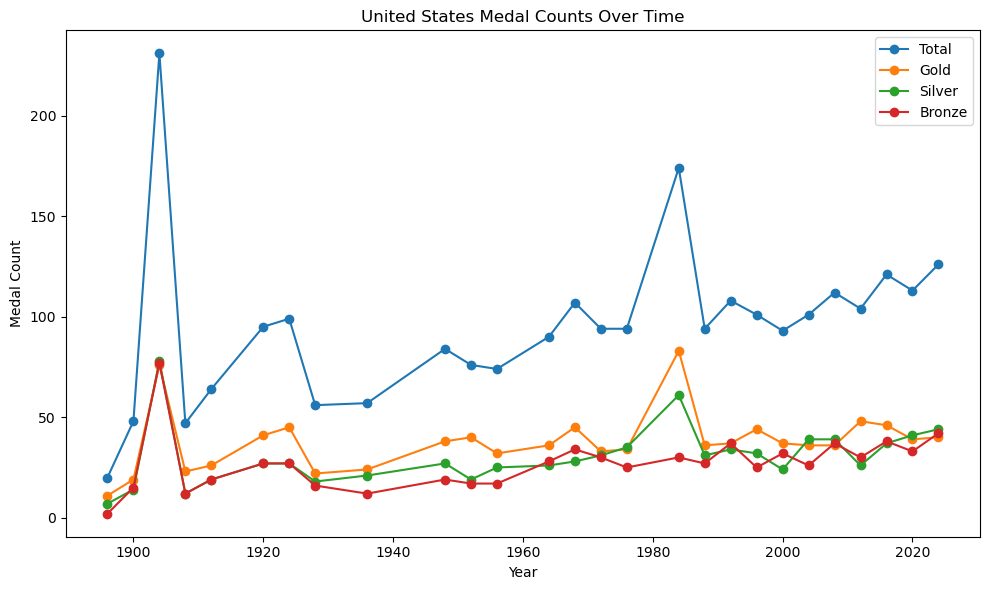

In [33]:
us = medal[medal['NOC'] == 'United States'].sort_values('Year')


plt.figure(figsize=(10, 6))
plt.plot(us['Year'], us['Total'], marker='o', label='Total')
plt.plot(us['Year'], us['Gold'], marker='o', label='Gold')
plt.plot(us['Year'], us['Silver'], marker='o', label='Silver')
plt.plot(us['Year'], us['Bronze'], marker='o', label='Bronze')

plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('United States Medal Counts Over Time')
plt.legend()
plt.tight_layout()
plt.show()

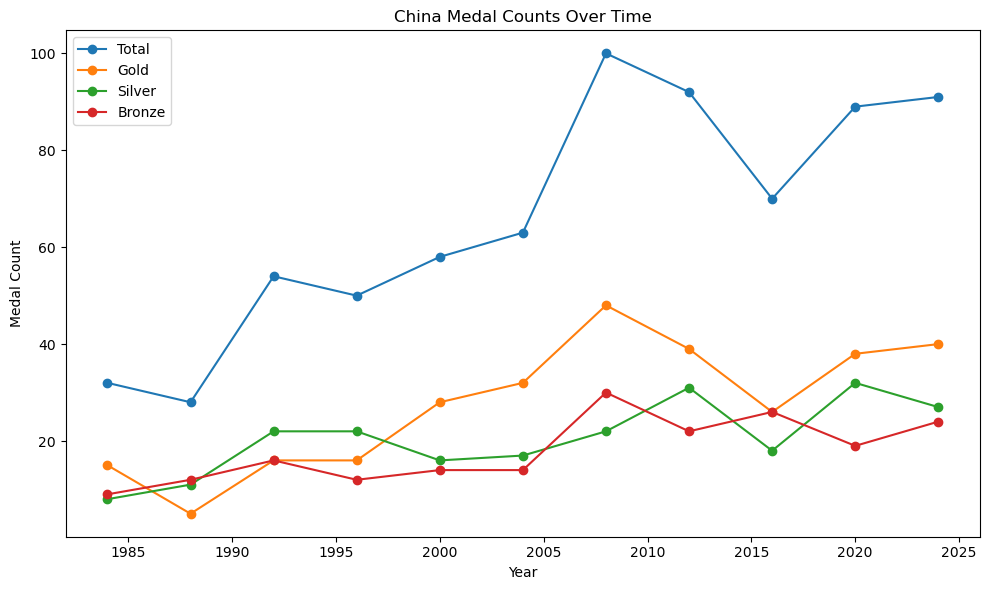

In [34]:
cn = medal[medal['NOC'] == 'China'].sort_values('Year')

plt.figure(figsize=(10, 6))
plt.plot(cn['Year'], cn['Total'], marker='o', label='Total')
plt.plot(cn['Year'], cn['Gold'], marker='o', label='Gold')
plt.plot(cn['Year'], cn['Silver'], marker='o', label='Silver')
plt.plot(cn['Year'], cn['Bronze'], marker='o', label='Bronze')

plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('China Medal Counts Over Time')
plt.legend()
plt.tight_layout()
plt.show()